<a href="https://colab.research.google.com/github/Research-method-group-3/Spaceship-Titanic/blob/Gboye/spaceship_data_v.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U kaleido
!pip install -U xgboost==1.7.2
!pip install -U scikit-learn==1.2.0
!pip install -U eli5
!pip install -U pandas
!pip install -U numpy==1.21.5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import gdown
from sklearn.ensemble import RandomForestRegressor # for building random forest models
from sklearn.preprocessing import StandardScaler # for data preprocessing
import matplotlib.pyplot as plt # for data visualization
from sklearn.metrics import mean_squared_error
pd.options.plotting.backend = "plotly"
set_config(transform_output = "pandas")
set_config(display='diagram')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


NameError: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import gdown

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install astropy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.utils.data import download_file

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/spaceship data1/sample_submission.csv')

In [ ]:
df.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
# Load the data
train_data = pd.read_csv("/content/drive/MyDrive/spaceship data1/train.csv") # load training data
test_data = pd.read_csv("/content/drive/MyDrive/spaceship data1/test.csv") # load test data

In [ ]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
df.isnull().sum().plot.bar()
plt.show()

In [ ]:
df.info

<bound method DataFrame.info of      PassengerId  Transported
0        0013_01        False
1        0018_01        False
2        0019_01        False
3        0021_01        False
4        0023_01        False
...          ...          ...
4272     9266_02        False
4273     9269_01        False
4274     9271_01        False
4275     9273_01        False
4276     9277_01        False

[4277 rows x 2 columns]>

In [ ]:
df.describe()

,PassengerId,Transported
count,4277,4277
unique,4277,1
top,0013_01,False
freq,1,4277


In [ ]:
train_data.shape , train_data.dtypes

((8693, 14),
 PassengerId      object
 HomePlanet       object
 CryoSleep        object
 Cabin            object
 Destination      object
 Age             float64
 VIP              object
 RoomService     float64
 FoodCourt       float64
 ShoppingMall    float64
 Spa             float64
 VRDeck          float64
 Name             object
 Transported        bool
 dtype: object)

Lets explore the data and ask questions to better understand the data.

The dataset has the following features:


PassengerId:Unique Id of a passenger
HomePlanet: The home planet of the passenger
CryoSleep: This is a kind of animation in which a passenger will be suspended during the whole voyage and remain confined to their cabin.
Cabin: Cabin number
Destination:
Age: Age in years
VIP: Indicates whether the person has opted for VIP service or not.
RoomService:
FoodCourt:
ShoppingMall:Commodities on which passengers of the spaceship can choose to spend.
Spa:
VRDeck:
Name:
Transported:This is the target column. This indicates whether the passenger has been transported to another dimension or not.


<Axes: xlabel='Age', ylabel='Count'>

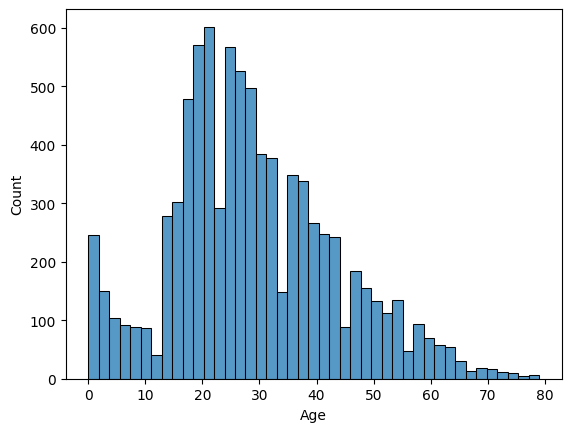

In [ ]:
sns.histplot(data=train_data,x="Age")

<Axes: xlabel='HomePlanet', ylabel='count'>

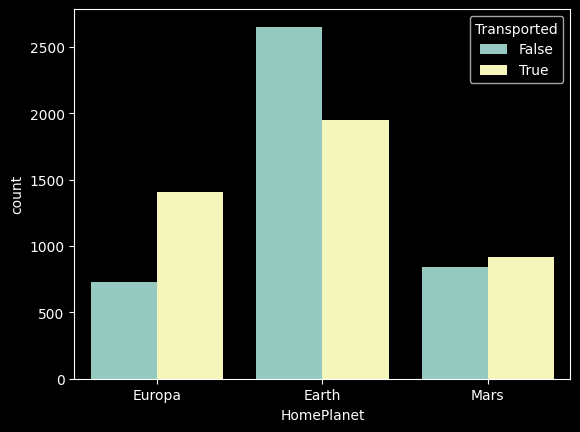

In [ ]:
sns.countplot(data=train_data,x="HomePlanet",hue="Transported")

<Axes: xlabel='Destination', ylabel='count'>

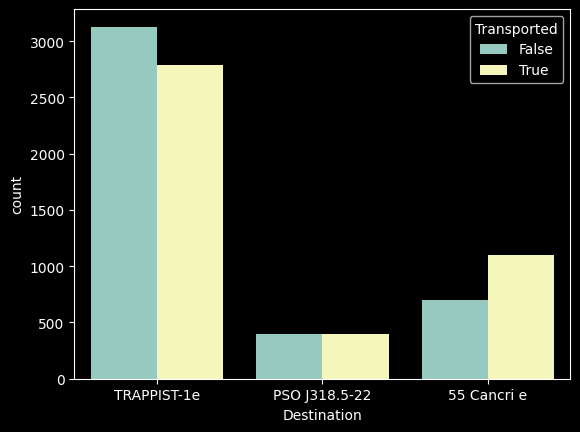

In [ ]:
sns.countplot(data=train_data,x="Destination",hue="Transported")

<Axes: xlabel='Cabin', ylabel='count'>

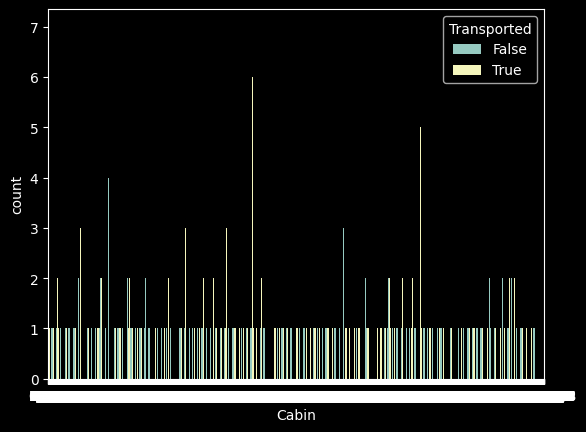

In [ ]:
sns.countplot(data=train_data,x="Cabin",hue="Transported")

<Axes: xlabel='VIP', ylabel='count'>

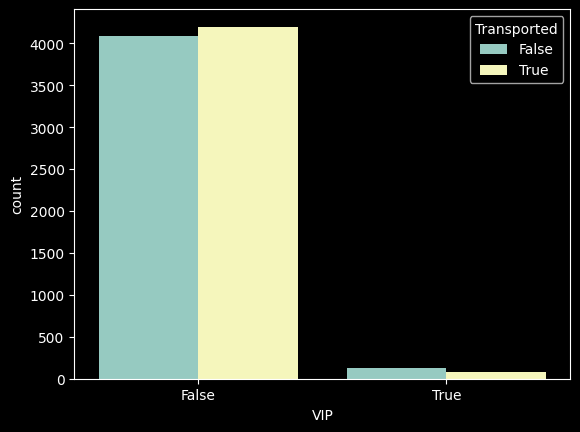

In [ ]:
sns.countplot(data=train_data,x="VIP",hue="Transported")

In [ ]:
df_group = df_clean.groupby(['Transported', 'Deck', 'Side', 'VIP', 'CryoSleep', 'HomePlanet', 'Destination']).agg(passenger_count=('Name', 'count'),
                                                      spa_mean=('Spa', 'mean'),
                                                      room_service_mean=('RoomService', 'mean'),
                                                      food_court_mean=('FoodCourt', 'mean'),
                                                      shopping_mall_mean=('ShoppingMall', 'mean'),
                                                      vr_deck_mean=('VRDeck', 'mean')
                                                      ).reset_index()

df_group.head()

NameError: ignored

In [ ]:
df_droped = df_clean.drop(columns=['passengerId', 'name', 'Age'])
object_column = df_droped.select_dtypes(include='object').columns.to_list()
df_cleaned = pd.get_dummies(df_droped, columns=object_column)


corr = df_cleaned.corr()

print(corr['Transported'])
#plt heat map
# Plot the heatmap
sns.heatmap(corr, cmap="Blues")

# Show the heatmap
plt.show()

NameError: ignored

Distribution of features

In [ ]:
preproc_funcs = []

# Break PassengerId into multiple features
def split_PassengerId(df, **kwargs):
    Group_GroupNum = df.PassengerId.str.split('_', expand=True)
    Group_GroupNum = Group_GroupNum.astype(int)
    df[['PassengerGroup', 'PassengerGroupNum']] = Group_GroupNum
    return df.drop(columns='PassengerId'), None

df, _ = split_passengerId(df)
preproc_funcs.append(split_passengerId)

# Break Cabin into multiple features
def split_cabin(df, **kwargs):
    Deck_Num_Side = df.cabin.str.split('/', expand=True)
    Deck_Num_Side = Deck_Num_Side
    df[['cabinDeck', 'cabinNum', 'cabinSide']] = Deck_Num_Side
    df.cabinNum = df.cabinNum.astype(float)
    return df.drop(columns='cabin'), None

df, _ = split_cabin(df)
preproc_funcs.append(split_cabin)

# Map categorical variables
def cat2number(df, categories = None, **kwargs):
    cat_cols = ['CabinDeck', 'CabinSide']  + ['HomePlanet', 'Destination']
    create_categories = True if categories is None else False
    if create_categories: categories = {}
    for col in cat_cols:
        if create_categories:
            categories_ = df[col].value_counts().index.sort_values().to_list()
            categories[col] = categories_
        else:
            categories_ = categories[col]
        mapping = {key:i for i, key in enumerate(categories_)}
        df[col] = df[col].map(mapping)
        print(f'Mapped {col} {mapping}')
    return df, categories

df, categories = cat2number(df)
preproc_funcs.append(cat2number)

# Convert to booleans
def bool2num(df, **kwargs):
    features = ['CryoSleep', 'VIP']
    df[features] = df[features].astype(bool)
    return df, None

df, _ = bool2num(df)
preproc_funcs.append(bool2num)

# Drop Name column
def drop_columns(df, drop_columns=['Name'], **kwargs):
    return df.drop(columns=drop_columns), None

df, _ = drop_columns(df)
preproc_funcs.append(drop_columns)

# Put Transported at the last column
def move_to_last(df, target = 'Transported', **kwargs):
    columns = df.columns.to_list()
    if target in columns:
        columns.remove(target)
        columns.append(target)
    return df[columns], None

df, _ = move_to_last(df)
preproc_funcs.append(move_to_last)

def prepare_dataset(df, funcs, **kwargs):
    df_ = df.copy()
    for func in funcs:
        df_, _ = func(df_, **kwargs)

    if kwargs['target'] in df_.columns.tolist():
        y = df_[kwargs['target']]
        X = df_.drop(columns=kwargs['target'])
    else:
        y = None
        X = df_
    return X, y


In [ ]:
from plotly.subplots import make_subplots

features = df.columns.to_list()
fig = make_subplots(6,3, subplot_titles=features)

for i, column in enumerate(features):
    fig.append_trace(go.Histogram(x=df[column], nbinsx=50, name=column), row=i // 3 + 1, col= i % 3 + 1 )
fig.update_layout(width=1200, height=1500, showlegend=False)
fig.show()

Most passengers are young (18-25]. However the baby population (0-2] is fairly high.
Most passengers did not Cryosleep.

Most passengers are going to TRAPPIST-1e.

There are very few VIPs.

Passenger group numbers are well distributed.

Most groups have only one passenger.

Last CabinDecks are more populated.

Cabin numbers are concentrated in the first values.

All the amenities services have a skewed distribution caused by few very high values.

Ideas for data transformations:

Age, PassengerGroup and CabinNum can be discretized.

Amenities columns are extremely skewed. Applying a log transformation can help.




In [ ]:
fig = make_subplots(5,3, subplot_titles=features)

temp = df.copy()
for i, feature in enumerate(features):
    if feature in ['Transported']: continue
    cut = True if temp[feature].nunique() > 10 else False
    temp.loc[:, f'{feature}_Bins']  =  pd.cut(temp.loc[:,feature], 10, include_lowest=True, precision=1) if cut else temp.loc[:, feature]
    s =  temp.groupby(f'{feature}_Bins').agg(
        Transported_=('Transported', lambda x: sum(x)),
        Not_Transported=('Transported', lambda x: sum(~x))
        )

    fig.append_trace(
        go.Bar(x=s.index.astype(str), y=s.Transported_, name=r'Transported', showlegend=False, marker_color='rgb(100,100,200)'),
        row=i // 3 + 1, col= i % 3 + 1
    )
    fig.append_trace(
        go.Bar(x=s.index.astype(str), y=s.Not_Transported, name=r'Not Transported', showlegend=False, marker_color='rgb(200,100,100)'),
        row=i // 3 + 1, col= i % 3 + 1
    )
    fig.update_layout(height=1500)

fig.show()

** - People that come from Earth are less likely to be transported.
- CryoSleep negatively affects the chance of being transported.
- Depending on the destination odds of being transported can be slightly higher or lower.
- Young childs are much more likely to be transported, especially when compared to young adults. Older people seem to have a 50/50 chance.
- Being a VIP does not really matter.
- It is hard to read tendencies from the amenities since the distributions are so skewed.
- The other features seem to have some kind of effect in the chances of being transported.

We can confirm those tendencies with a correlation matrix.**

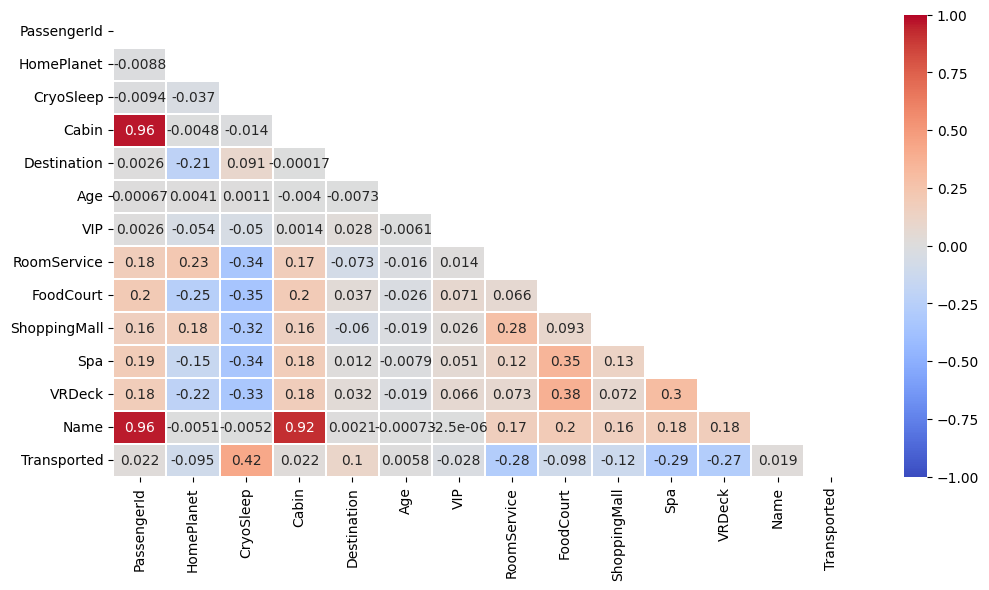

In [ ]:
#@title Default title text
plt.figure(4, figsize=(12, 6))
corr = train_data.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [ ]:
missing_values(train_data)

NameError: ignored